### Agenda

In this session, we will cover the following concepts with the help of a business use case:
    
    K-means clustering
    Deciding optimal number of clusters:
        Elbow method
Now, let's understand k-means clustering with a use case.

### Problem Statement:

Lithionpower is the largest provider of electric vehicle batteries.It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company. Lithionpower has a variable pricing model based on the driver's driving history. Battery life depends on factors like
overspeeding, distance driven per day, and so on.

### Objective:

Create a cluster model where drivers can be grouped together based on their driving data. Group the data points so that drivers will be incentivized based on the cluster.

### Data Dictionary

For the sake of simplicity, you will take only two features such as mean distance driven per day and the mean percentage of time when a driver was more than 5 mph over the speed limit.

Here are what the data represent:

id: Unique ID of the driver

mean_dist_day: Mean distance driven by driver per day

mean_over_speed_perc: Mean percentage of time when a driver was more than 5 mph over the speed limit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course5_Machine Learning/Datasets_sep/Caltech LVC Datasets/Lesson 5/Dataset/driver-data.csv")
df.head()


,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
#Check number of columns and rows, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
df.dtypes


id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

### Visualize the Data Points

Text(0, 0.5, 'mean_over_speed_perc')

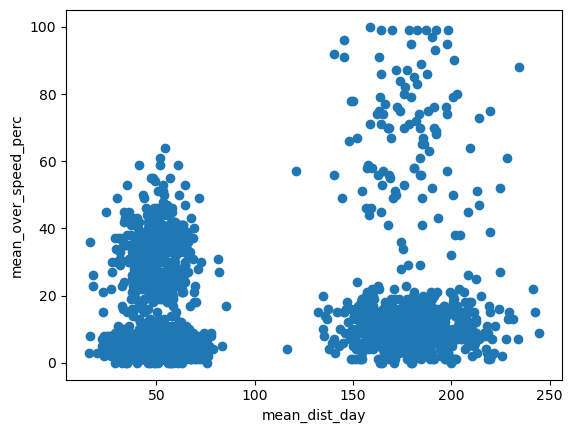

In [5]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')


Now we have to cluster the data points that we can group or label in different categories, and this is where K-Means Clustering comes into the picture.

### K-Means Clustering

K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

Clusters in "k-means clustering" follow these two underlying rules:
    
    The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    
    Each point is closer to its own cluster center than to other cluster centers.

## K-Means: Expectation–Maximization

K-Means is a particularly simple and easy-to-understand application of an iterative algorithm known as Expectation–Maximization.

The expectation–maximization approach consists of the following procedures:
1. Guess some of the cluster centers
2. Repeat until converged
    
    E-Step: Assign points to the nearest cluster center
    
    M-Step: Set the cluster centers to the mean

Now, let's see how the algorithm works.

## K-Means Clustering Algorithm

Step 1: Start by making a guess on where the central points of each cluster are. Let us call these pseudo-centers, since we do not know yet if they are actually at the center of their clusters.

Step 2: Assign each data point to the nearest pseudo-center. By doing so, we have just formed clusters, with each cluster comprising all data points associated with its pseudo-center.

Step 3: Update the location of each cluster’s pseudo-center, such that it is now indeed in the center of all its members.

Step 4: Repeat the steps of reassigning cluster members (Step 2) and relocating cluster centers (Step 3), until there are no more

In [6]:
from sklearn.cluster import KMeans


#### Run the Algorithm with K=3

Fit the model to all the data, except for the ID label.

In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted


/Users/michaeldionne/opt/anaconda3/envs/dev39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

#### Add the Predicted Clusters Column to the Dataset

In [ ]:
df['cluster']=y_predicted
df.sample(5)


,id,mean_dist_day,mean_over_speed_perc,cluster
1549,3423313551,36.53,6,0
2695,3423312280,46.73,5,0
1648,3423314390,41.92,5,0
914,3423310747,42.96,3,0
3108,3423311287,23.20,8,0


#### Get the Coordinates of Cluster Centers

In [ ]:
km.cluster_centers_


array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

#### Plot the Clusters with their Centroids

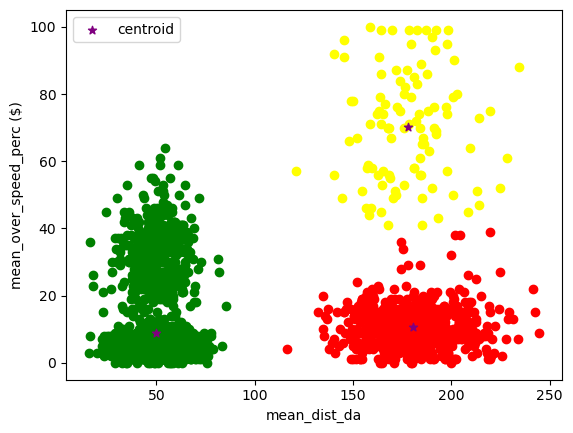

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()


## Decide the Optimal Number of Clusters

Now, the next question that comes to our mind is how to determine the number of clusters. In our dataset, we got an intuition. However,for a larger dataset, it is hard to determine the number of clusters.

To overcome this shortcoming, there is a method called elbow method.

### What Is Elbow Method?

It's a popular technique that involves running k-means clustering for a set of k clusters (let's say 1 to 10) and calculating the sum of squared distances from each point to its assigned center (inertia).

When the inertias are plotted and the plot looks like an arm, the “elbow” (the point of inflection on the curve) is the best value of k.

### Take k = 1 to 10 and append them in a list

In [8]:
# take k=1 and append them in a list

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)
sse



/Users/michaeldionne/opt/anaconda3/envs/dev39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'